In [2]:
import pandas as pd
import scanpy as sc

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

from filter_adata import adata_filtered, adata_hightumour, adata_peritumour

from pathlib import Path 

home_path = '/Users/nabilazulkapeli/Documents/Honours Thesis 2025/nabs_data'
home_path = Path(home_path)
fig_path = home_path / f'deconvol_figs'
fig_path.mkdir(parents=True, exist_ok=True)
fig_path = Path(fig_path)

sns.set_theme(context='paper', style='ticks',font='sans-serif', font_scale=2.5)

In [28]:
specific_colors = {
    "Melanoma": "#C3C3C3",
    "Endothelial": "#9467bd",
    "Epithelial": "#cf76ff",
    "cCAF": "#1f77b4",
    "iCAF": "#ff7f0e",
    "Mast": "#2ca02c",
    "Granulocyte": "#d62728",
    "Dendritic": "#8c564b",
    "M1 TAM": "#e8af29",
    "M2 TAM": "#5B83AE",
    "Ig-TAM": "#1f24ad",
    "Plasmablast": "#0DBBA7",
    "Plasma": "#74c476",
    "TLS": "#f04fc0",
    "CD4 T": "#9eb029",
    "CD8 T": "#17becf"
}
specific_markers = {
    'CD8 T': ['CD8A', 'CD8B', 'GZMK','CD27'],
    'CD4 T': ['CD3E', 'CXCR3', 'CCR4'],
    'Plasma': ['IGHG1', 'IGKC', 'TNFRSF17', 'JCHAIN', 'MZB1'],
    'Plasmablast': ['CD19', 'MS4A1', 'BANK1', 'CXCR5'],
    #'TLS'
    'Ig-TAM': ['CD14', 'CD163'],
    'M1 TAM': ['CXCL9', 'CXCL10', 'CXCL11'],
    'M2 TAM': ['CHIT1', 'GPR34', 'TREM2', 'VSIG4', 'MARCO'],
    'Dendritic': ['ITGAX', 'FCER1A', 'CD80', 'CD86', 'CLEC10A'],
    'Granulocyte': ['CEACAM8', 'CCL16', 'CCL28'],
    'iCAF': ['IFIT3', 'STAT1', 'TAP1'],
    'cCAF': ['PDGFRA', 'DCN', 'LUM', 'VCAN'],
    'Endothelial': ['CLEC14A', 'PLVAP', 'SPARCL1'],
    'Epithelial':['MUC5AC', 'REG4', 'CDX2', 'EPCAM'], # epithelial
    'Mast':['CPA3', 'MS4A2', 'HPGDS'], # mast
    'Melanoma':['S100B', 'CDKN2A', 'MKI67', 'UBE2C', 'CCND1', 'CTNNB1'] # melanoma
}
specific_order = [
    'CD8 T',
    'CD4 T',
    'Plasma',
    'Plasmablast',
    'TLS',
    'Ig-TAM',
    'M1 TAM',
    'M2 TAM',
    'Dendritic',
    'Granulocyte',
    'iCAF',
    'cCAF',
    'Endothelial',
    'Epithelial',
    'Mast',
    'Melanoma'
]

<Figure size 110x40 with 0 Axes>

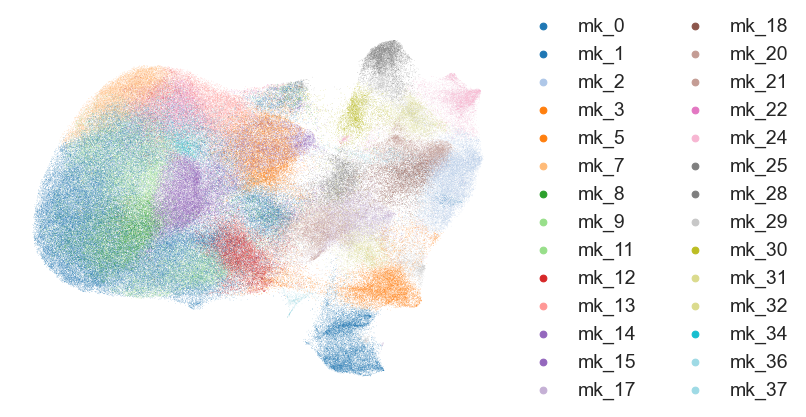

In [27]:
plt.figure(figsize=(1.1,0.4))
sc.pl.umap(
    adata_filtered,
    color="X_scANVI_predicted_2",
    legend_fontsize=14,
    frameon=False,
    show=False,
    title="",
    palette='tab20'
)
plt.savefig(fig_path / 'mk_clusters_umap.png', bbox_inches='tight',dpi=300, transparent=True)

<Figure size 400x400 with 0 Axes>

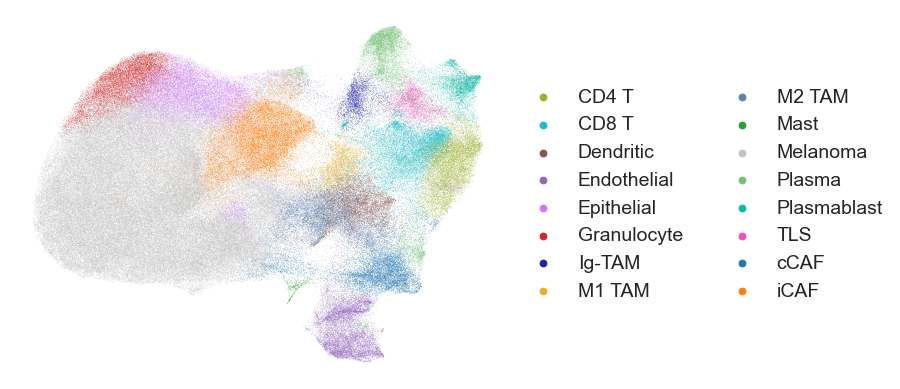

In [14]:
plt.figure(figsize=(4, 4))
sc.pl.umap(
    adata_filtered,
    color="new_specific_labels",
    legend_fontsize=14,
    legend_fontoutline=1,
    frameon=False,
    show=False,
    title="",
    palette=specific_colors
)
plt.savefig(fig_path / 'specific_umap.png', bbox_inches='tight',dpi=300, transparent=True)

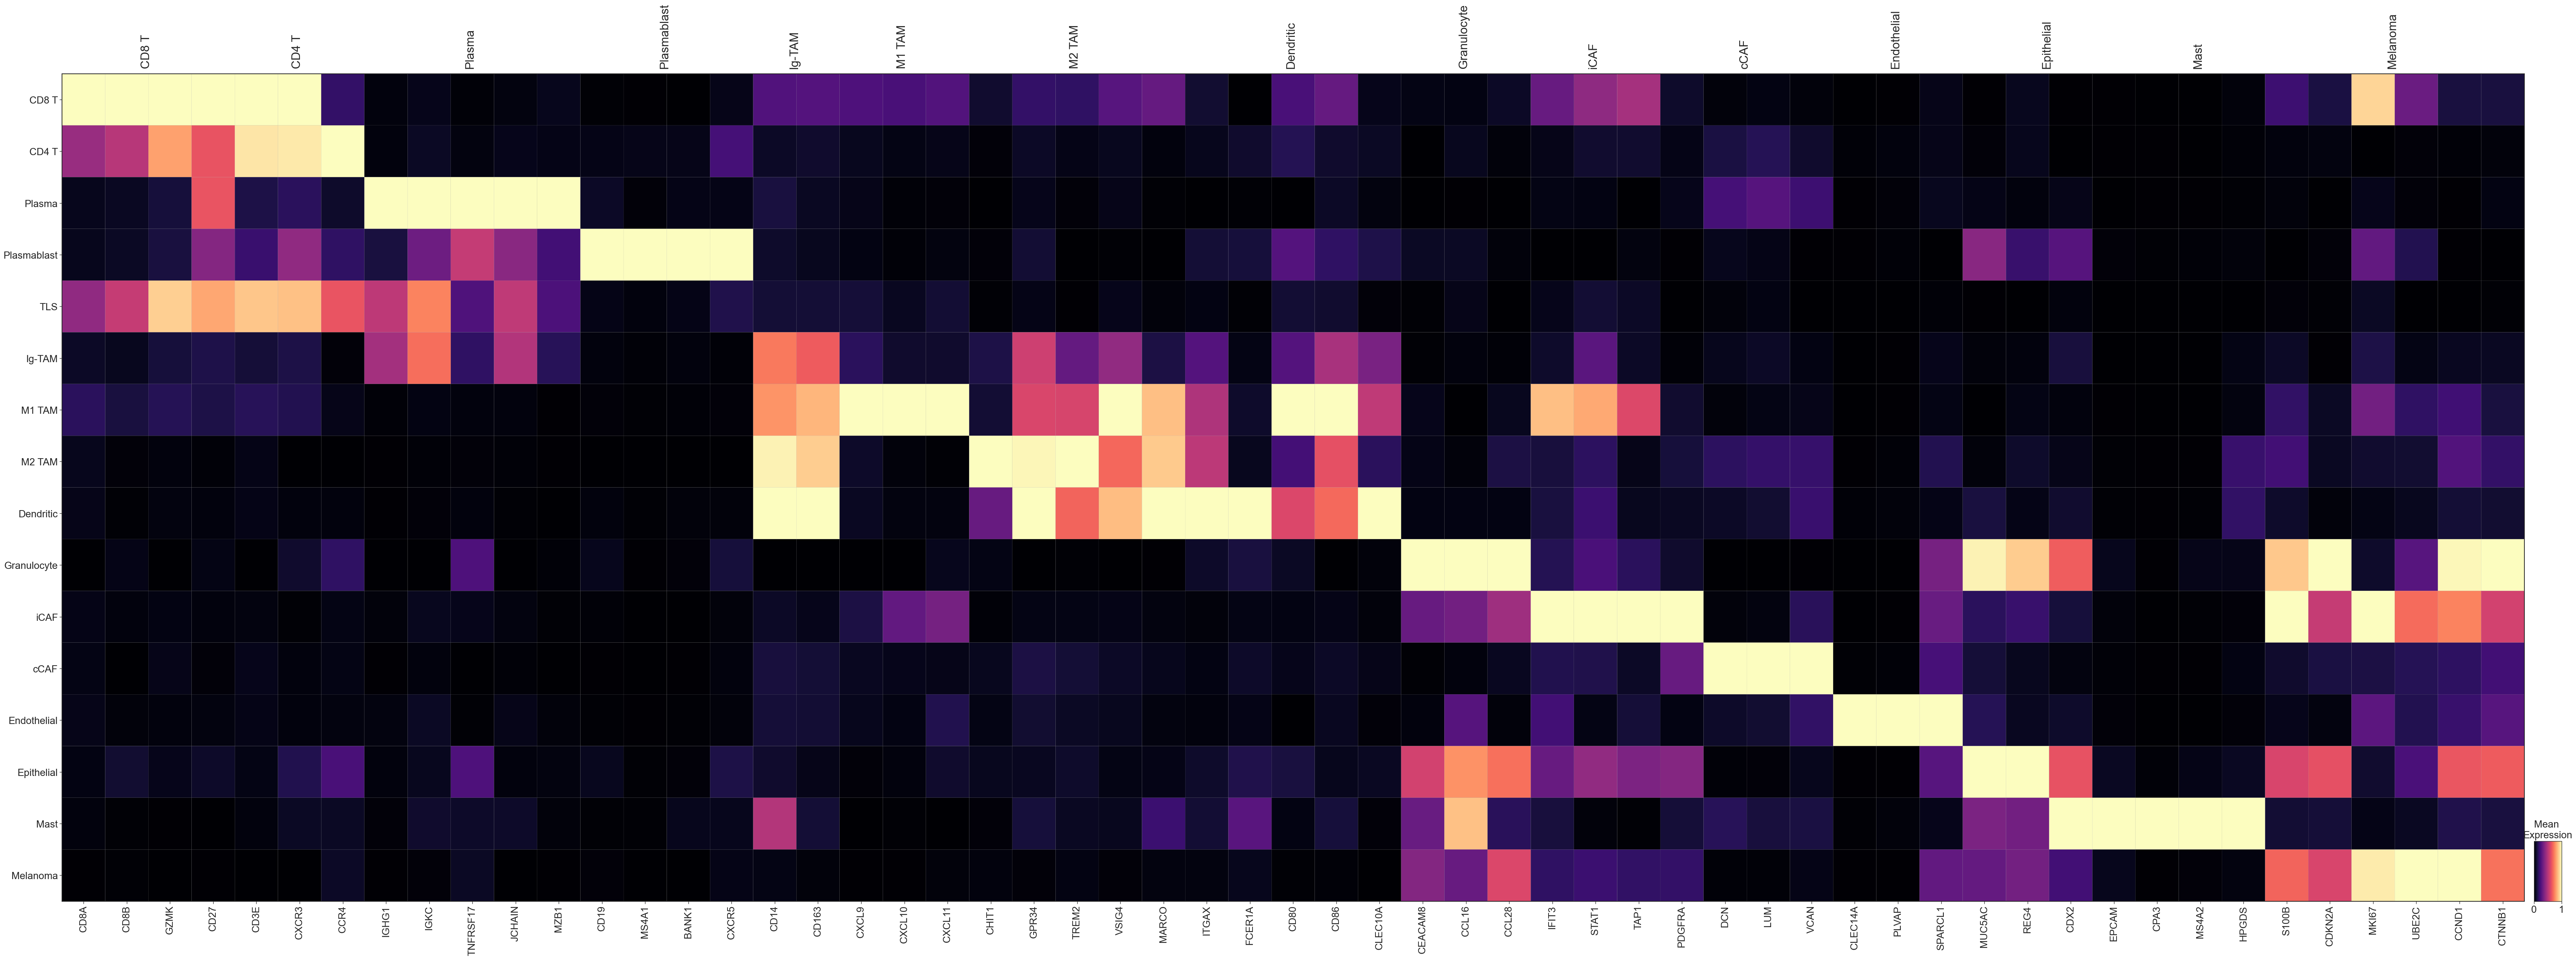

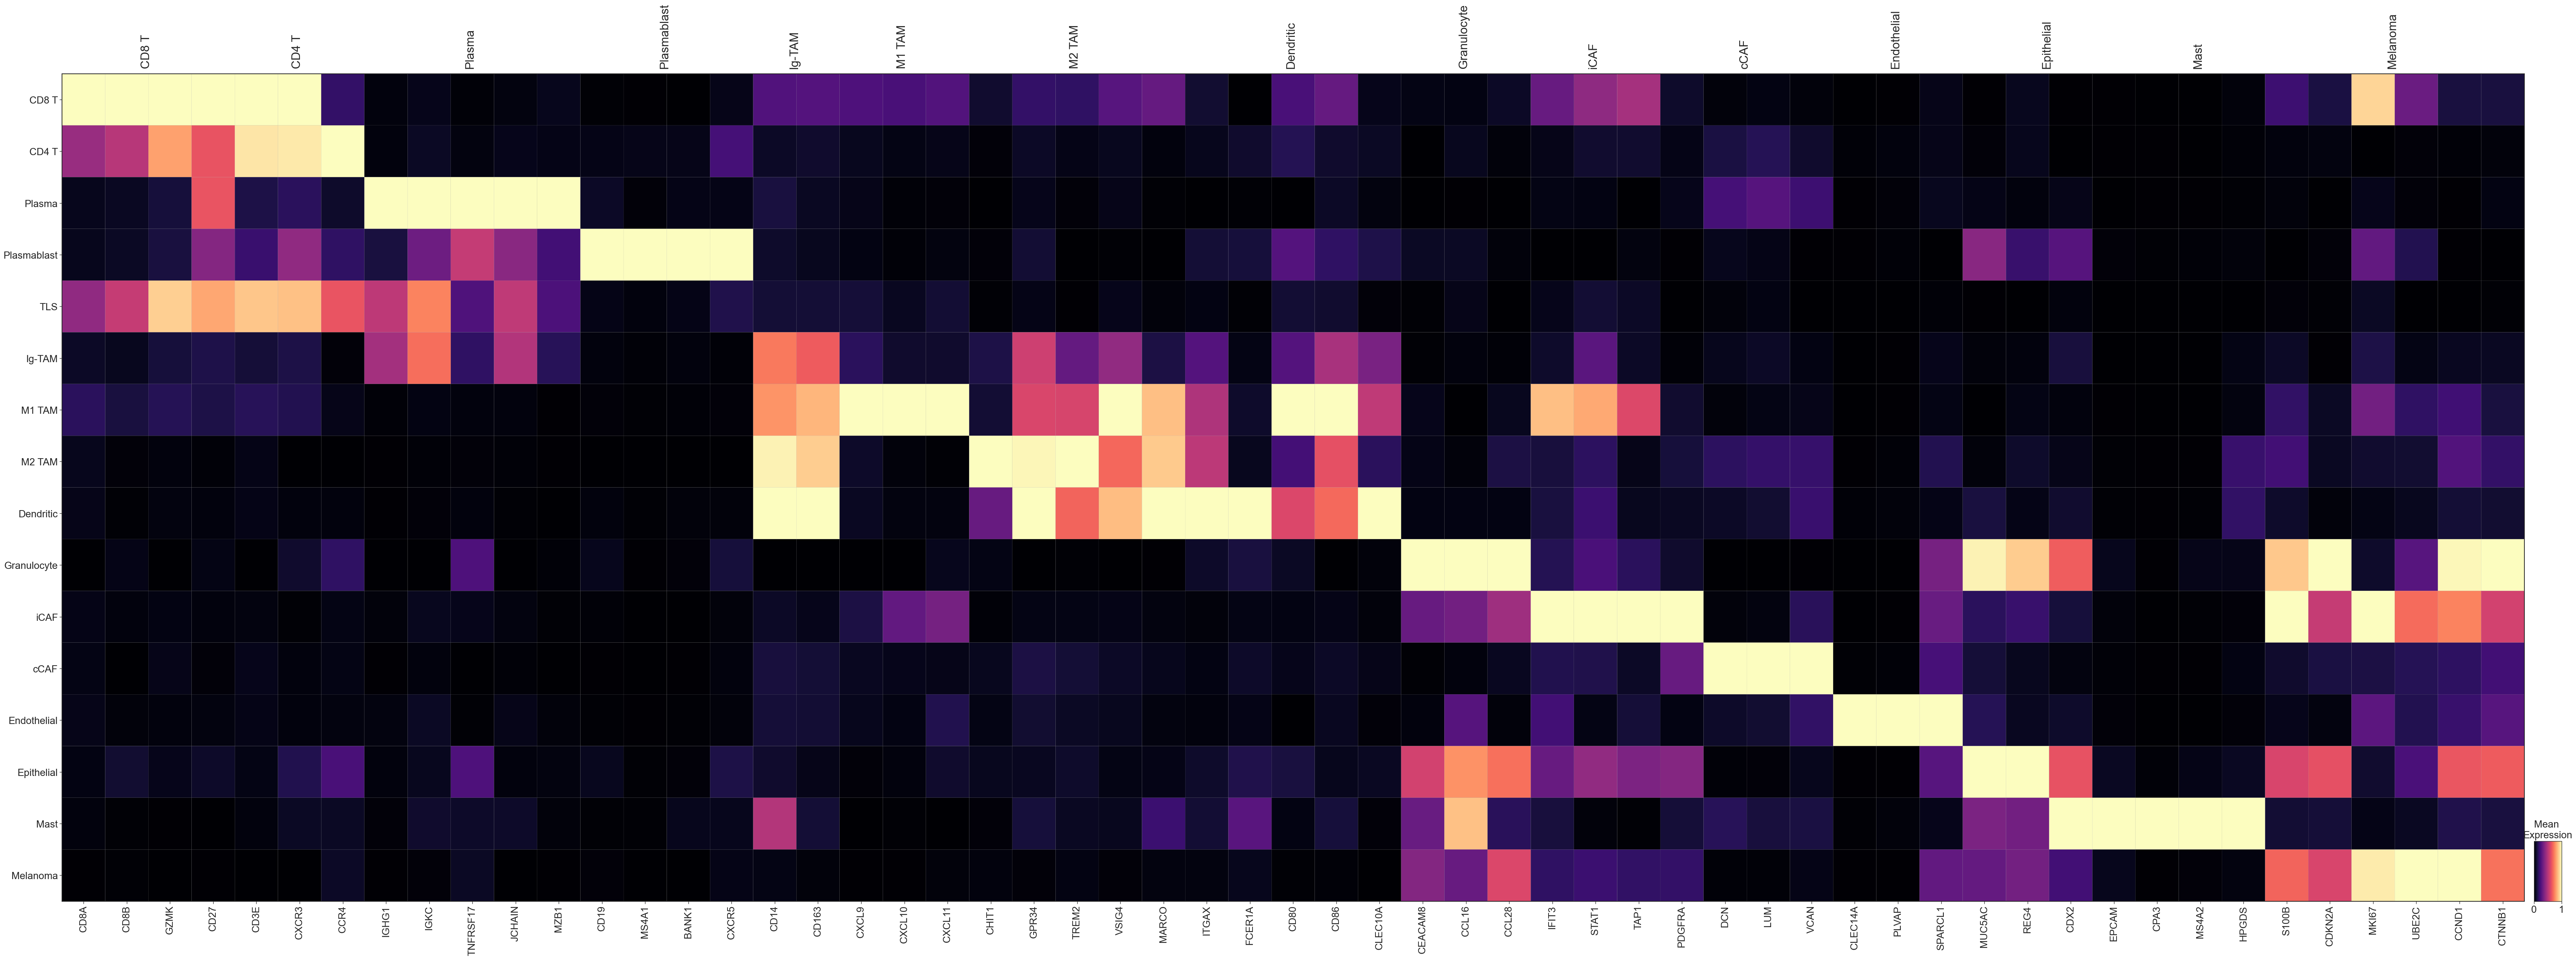

In [46]:
mp = sc.pl.matrixplot(
    adata_filtered,
    specific_markers,
    'new_specific_labels',
    standard_scale='var',
    colorbar_title='Mean \nExpression',
    cmap='magma',
    return_fig=True,
    categories_order=specific_order,
    figsize=(90,30)
    )
mp.legends_width=1
mp.show()
mp.savefig(fig_path / 'new_specific_heatmap.pdf', transparent=True, dpi=300, bbox_inches='tight')